In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
data = pd.read_csv("target.csv")

In [3]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [4]:
data = data.dropna(how='any')

In [5]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int)

In [6]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [7]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [8]:
Y = data['res_type'].values.astype('int64')

In [9]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [10]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [11]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [12]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [14]:
model = Sequential()

In [15]:
model.add(Conv1D(filters=16*4,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(8,1), 
                 activation='relu'))

In [16]:
model.add(MaxPooling1D(pool_size=1))

In [17]:
model.add(Conv1D(filters=16*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [18]:
model.add(MaxPooling1D(pool_size=1))

In [19]:
model.add(Conv1D(filters=16*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [20]:
model.add(MaxPooling1D(pool_size=1))

In [21]:
model.add(Conv1D(filters=16,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [22]:
model.add(MaxPooling1D(pool_size=1))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(8, activation='tanh'))

In [25]:
model.add(Dense(5,activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 64)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 48)             3120      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 48)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 32)             1568      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 8, 16)             528       
__________

In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [28]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 63043 samples, validate on 15761 samples
Epoch 1/30
63043/63043 [==============================] - 5s 82us/step - loss: 1.4435 - acc: 0.3359 - val_loss: 1.2648 - val_acc: 0.4922
Epoch 2/30
63043/63043 [==============================] - 4s 62us/step - loss: 1.0327 - acc: 0.6482 - val_loss: 0.7446 - val_acc: 0.8245
Epoch 3/30
63043/63043 [==============================] - 4s 65us/step - loss: 0.5462 - acc: 0.8873 - val_loss: 0.3993 - val_acc: 0.9300
Epoch 4/30
63043/63043 [==============================] - 4s 62us/step - loss: 0.3366 - acc: 0.9518 - val_loss: 0.2824 - val_acc: 0.9670
Epoch 5/30
63043/63043 [==============================] - 4s 61us/step - loss: 0.2507 - acc: 0.9759 - val_loss: 0.2247 - val_acc: 0.9836
Epoch 6/30
63043/63043 [==============================] - 4s 61us/step - loss: 0.2065 - acc: 0.9815 - val_loss: 0.1895 - val_acc: 0.9847
Epoch 7/30
63043/63043 [==============================] - 5s 87us/step - loss: 0.1768 - acc: 0.9825 - val_loss: 0.1717 - val_acc

In [29]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

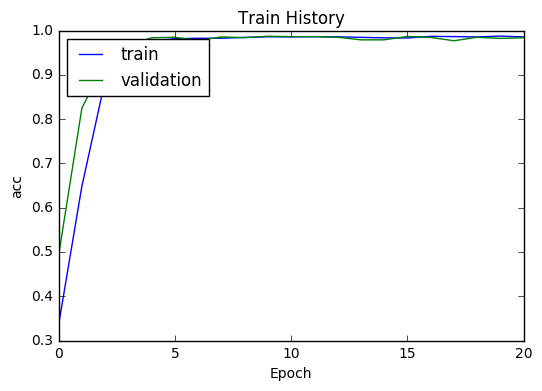

In [30]:
show_train_history(train_history,'acc','val_acc')

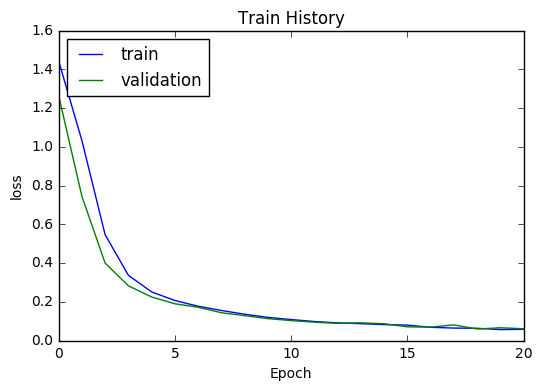

In [31]:
show_train_history(train_history,'loss','val_loss')

In [32]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 1s 43us/step


In [33]:
scores[1]

0.9863973200508767